## Method 2: Random sample imputation

Taking random observations and replacing it in nan values in the dataset

### When to use?
Data is Missing completely at Random (MCAR)

# Imports

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Gathering the data

In [2]:
data = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
data.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
data.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [5]:
#data['Age'].dropna()
data['Age'].isnull().sum()

177

In [6]:
# Takes the Nan values and replaces it with some random values:
data['Age'].dropna().sample(data['Age'].isnull().sum(),random_state=10)

728    25.0
555    62.0
426    28.0
278     7.0
617    26.0
       ... 
696    44.0
486    35.0
44     19.0
62     45.0
571    53.0
Name: Age, Length: 177, dtype: float64

In [7]:
data.shape

(891, 3)

In [8]:
data['Age'].shape

(891,)

In [9]:
# Gets the index of the Nan values:
data[data['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [10]:
median = data['Age'].median()

In [11]:
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    #Removing the nan values and replacing with random values
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=10)
    #To replace they must have the same index:
    random_sample.index = df[df[variable].isnull()].index
    #Replacing the values
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [12]:
impute_nan(data,'Age',median)

In [13]:
data.tail()

,Survived,Age,Fare,Age_median,Age_random
886,0,27.0,13.00,27.0,27.0
887,1,19.0,30.00,19.0,19.0
888,0,NaN,23.45,28.0,53.0
889,1,26.0,30.00,26.0,26.0
890,0,32.0,7.75,32.0,32.0


In [14]:
data['Age_random'].isnull().sum()

0

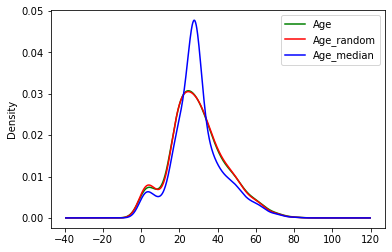

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde',ax=ax,color='green')
data['Age_random'].plot(kind='kde',ax=ax,color='red')
data['Age_median'].plot(kind='kde',ax=ax,color='blue')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

#### Advantages:
    1) Easy to implement
    2) There is less distortion in variance
##### Disadvantages
    1) Randomness does not work always

## Method 3: Capturing NAN values with new feature

Works well when the data is not completely missing at random

In [16]:
data3 = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
data3.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [18]:
# The purpose of adding a new column is to notify the model that something has been replaced 
#in the column: 
data3['Age_nan'] = np.where(data3['Age'].isnull(),1,0)

In [22]:
data3['Age'].fillna(data3['Age'].median(),inplace=True)

In [24]:
data3.head(10)

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


### Advantages:
1) Captures the importance of missing values

### Disadvantages:
1) Can lead to adding additional columns (Curse of Dimensionality)

## Method 4: End of Distribution Imputation:

In [47]:
data4 = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
data4.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


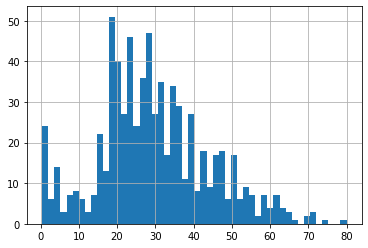

In [48]:
data4['Age'].hist(bins=50)

In [49]:
#Getting the 3rd standard deviation value:
extreme = data4['Age'].mean() + 3*data4['Age'].std()

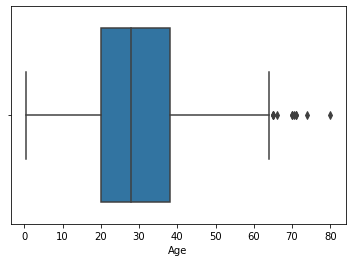

In [50]:
#Viewing the outliers:
sns.boxplot('Age',data=data4)
#Outliers are present

In [52]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [53]:
median = data4['Age'].median() 
impute_nan(data4,'Age',median,extreme)

In [54]:
data4.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


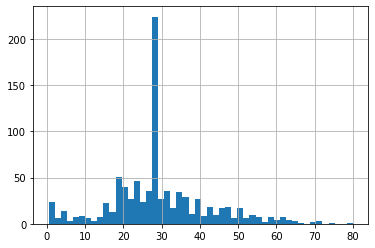

In [57]:
data4['Age'].hist(bins=50)

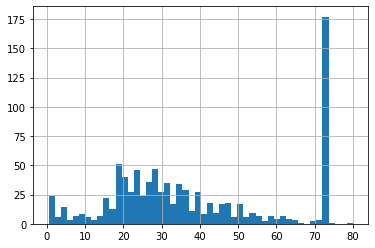

In [59]:
data4['Age_end_distribution'].hist(bins=50)

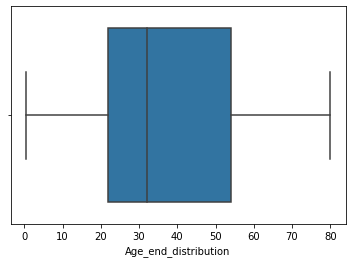

In [61]:
sns.boxplot('Age_end_distribution',data=data4)
#Outliers are removed

#### Advantages:
1) Easy to implement
2) Captures the importance of missingness of there is one

#### Disadvantages:
1) Distorts the original distribution of the variance
2) If the number of NA is big , then it will mask true outliers in the distribution
3) If the number of NA is small , the replaced NA may be considered as an outlier

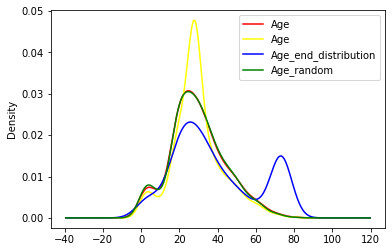

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde',ax=ax,color='red')
data4['Age'].plot(kind='kde',ax=ax,color='yellow') #Median
data4['Age_end_distribution'].plot(kind='kde',ax=ax,color='blue') #3rd Sd
data['Age_random'].plot(kind='kde',ax=ax,color='green') #Random values
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')